### Source of data: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

The dataset contains information on US flights for the year of 2023. Aim is to predict the likelihood of a particular flight being delayed. This notebook aims to perform data cleaning, preprocesssing and exploratory data analysis on this dataset.

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Load data

In [263]:
# df1 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_1.csv')
# df2 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_2.csv')
# df3 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_3.csv')
# df4 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_4.csv')
# df5 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_5.csv')
# df6 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_6.csv')
# df7 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_7.csv')
# df8 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_8.csv')
# df9 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_9.csv')
# df10 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_10.csv')
# df11 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_11.csv')
# df12 = df = pd.read_csv(f'2022_flight_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_12.csv')
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

In [264]:
df = pd.read_csv('2022_us_flight_data.csv')

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_24972/4210004930.py:1: DtypeWarning: Columns (48,69,76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2022_us_flight_data.csv')


In [265]:
df.shape

(6729125, 110)

In [266]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2022,1,1,14,5,2022-01-14,YX,20452,YX,N119HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,1,15,6,2022-01-15,YX,20452,YX,N122HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,1,16,7,2022-01-16,YX,20452,YX,N412YX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,1,17,1,2022-01-17,YX,20452,YX,N405YX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,1,1,18,2,2022-01-18,YX,20452,YX,N420YX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Save the merged raw data into a csv

In [267]:
# df.to_csv('2022_us_flight_data.csv', index=False)

## Data size: 2.5 GB

# Data cleaning & EDA

### Check columns

In [268]:
for c in df.columns:
    print(c)

Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime
Div1LongestGTime
Div1W

In [269]:
cols_to_keep = ['Year',
'Month',
'DayofMonth',
'DayOfWeek',
'FlightDate',
'Reporting_Airline',
'Origin',
'OriginCityName',
'OriginStateName',
'Dest',
'DestCityName',
'DestStateName',
'DepTime',
'DepDelay',
'ArrTime',
'ArrDelay',
'Cancelled',
'Diverted',
'AirTime',
'Distance',
'CarrierDelay',
'WeatherDelay',
'NASDelay',
'SecurityDelay',
'LateAircraftDelay']

In [270]:
df = df[cols_to_keep]

In [271]:
df.shape

(6729125, 25)

In [272]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,...,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2022,1,14,5,2022-01-14,YX,CMH,"Columbus, OH",Ohio,DCA,...,4.0,0.0,0.0,63.0,323.0,NaN,NaN,NaN,NaN,NaN
1,2022,1,15,6,2022-01-15,YX,CMH,"Columbus, OH",Ohio,DCA,...,-24.0,0.0,0.0,50.0,323.0,NaN,NaN,NaN,NaN,NaN
2,2022,1,16,7,2022-01-16,YX,CMH,"Columbus, OH",Ohio,DCA,...,-13.0,0.0,0.0,53.0,323.0,NaN,NaN,NaN,NaN,NaN
3,2022,1,17,1,2022-01-17,YX,CMH,"Columbus, OH",Ohio,DCA,...,9.0,0.0,0.0,56.0,323.0,NaN,NaN,NaN,NaN,NaN
4,2022,1,18,2,2022-01-18,YX,CMH,"Columbus, OH",Ohio,DCA,...,-29.0,0.0,0.0,48.0,323.0,NaN,NaN,NaN,NaN,NaN


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729125 entries, 0 to 6729124
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   FlightDate         object 
 5   Reporting_Airline  object 
 6   Origin             object 
 7   OriginCityName     object 
 8   OriginStateName    object 
 9   Dest               object 
 10  DestCityName       object 
 11  DestStateName      object 
 12  DepTime            float64
 13  DepDelay           float64
 14  ArrTime            float64
 15  ArrDelay           float64
 16  Cancelled          float64
 17  Diverted           float64
 18  AirTime            float64
 19  Distance           float64
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
dtypes: float64(13), in

In [274]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6729125.0,6.729125e+06,6.729125e+06,6.729125e+06,6.551856e+06,6.551777e+06,6.546173e+06,6.532012e+06,6.729125e+06,6.729125e+06,6.532012e+06,6.729125e+06,1.376798e+06,1.376798e+06,1.376798e+06,1.376798e+06,1.376798e+06
mean,2022.0,6.557589e+00,1.573677e+01,3.982633e+00,1.333922e+03,1.260401e+01,1.460430e+03,7.035647e+00,2.694050e-02,2.351866e-03,1.127940e+02,8.160559e+02,2.676764e+01,3.735805e+00,1.130610e+01,1.425205e-01,2.533099e+01
std,0.0,3.405035e+00,8.784037e+00,2.001792e+00,5.068266e+02,5.250278e+01,5.436713e+02,5.435257e+01,1.619096e-01,4.843898e-02,7.029672e+01,5.954766e+02,7.448378e+01,3.066576e+01,2.882148e+01,3.699485e+00,5.544170e+01
min,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,-1.000000e+02,0.000000e+00,0.000000e+00,8.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,4.000000e+00,8.000000e+00,2.000000e+00,9.140000e+02,-5.000000e+00,1.046000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,6.100000e+01,3.860000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022.0,7.000000e+00,1.600000e+01,4.000000e+00,1.324000e+03,-2.000000e+00,1.501000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,9.600000e+01,6.660000e+02,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2022.0,9.000000e+00,2.300000e+01,6.000000e+00,1.745000e+03,1.000000e+01,1.917000e+03,1.000000e+01,0.000000e+00,0.000000e+00,1.420000e+02,1.050000e+03,2.600000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.000000e+01
max,2022.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,3.433000e+03,2.400000e+03,3.423000e+03,1.000000e+00,1.000000e+00,7.270000e+02,5.095000e+03,3.423000e+03,2.363000e+03,1.740000e+03,1.245000e+03,2.302000e+03


In [275]:
non_numerical_cols = ['FlightDate', 'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
                     'Dest', 'DestCityName', 'DestStateName', ]

In [276]:
df[non_numerical_cols].describe()

,FlightDate,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName
count,6729125,6729125,6729125,6729125,6729125,6729125,6729125,6729125
unique,365,17,372,366,53,373,367,53
top,2022-07-21,WN,ATL,"Chicago, IL",California,ATL,"Chicago, IL",California
freq,20052,1307149,317926,337439,733033,317910,337469,733066


In [277]:
df.corr()

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_24972/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Month,DayofMonth,DayOfWeek,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.007006,-0.002042,-0.000285,0.002888,-0.000822,0.008205,-0.032021,-0.000644,-0.008822,-0.003265,-0.008413,0.004905,-0.004542,-0.000716,0.012806
DayofMonth,NaN,0.007006,1.000000,-0.010965,-0.000952,0.002689,-0.002494,0.002772,0.003420,0.001377,0.001456,0.001330,-0.000538,0.003666,0.002762,0.002605,0.003909
DayOfWeek,NaN,-0.002042,-0.010965,1.000000,0.004317,0.026728,0.000170,0.026608,0.019381,0.001342,0.009820,0.012066,0.010018,-0.003235,-0.004062,0.003531,0.012552
DepTime,NaN,-0.000285,-0.000952,0.004317,1.000000,0.122877,0.604934,0.122789,0.009508,0.002253,-0.016737,-0.012913,-0.067128,-0.014200,-0.040725,-0.005753,0.114566
DepDelay,NaN,0.002888,0.002689,0.026728,0.122877,1.000000,0.016058,0.968492,0.026727,0.015576,0.022187,0.023060,0.714467,0.264750,0.081211,0.022209,0.519490
ArrTime,NaN,-0.000822,-0.002494,0.000170,0.604934,0.016058,1.000000,0.024039,NaN,0.007851,0.014562,0.009989,-0.067964,-0.010565,0.013968,-0.002963,-0.022909
ArrDelay,NaN,0.008205,0.002772,0.026608,0.122789,0.968492,0.024039,1.000000,NaN,NaN,0.015489,0.002605,0.711507,0.276377,0.180152,0.021128,0.502316
Cancelled,NaN,-0.032021,0.003420,0.019381,0.009508,0.026727,NaN,NaN,1.000000,-0.008079,NaN,-0.013591,NaN,NaN,NaN,NaN,NaN
Diverted,NaN,-0.000644,0.001377,0.001342,0.002253,0.015576,0.007851,NaN,-0.008079,1.000000,NaN,0.014937,NaN,NaN,NaN,NaN,NaN


## Handle null values

In [278]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
FlightDate                 0
Reporting_Airline          0
Origin                     0
OriginCityName             0
OriginStateName            0
Dest                       0
DestCityName               0
DestStateName              0
DepTime               177269
DepDelay              177348
ArrTime               182952
ArrDelay              197113
Cancelled                  0
Diverted                   0
AirTime               197113
Distance                   0
CarrierDelay         5352327
WeatherDelay         5352327
NASDelay             5352327
SecurityDelay        5352327
LateAircraftDelay    5352327
dtype: int64

### If we don't have arr/dept time or arr/dept delay, we can't predict delay in flights, hence dropping those rows where these columns are null

In [279]:
df.shape[0]-197113

6532012

In [280]:
df = df[(df['DepTime'].notnull() & df['DepDelay'].notnull() & df['ArrTime'].notnull() & df['ArrDelay'].notnull())]

In [281]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
FlightDate                 0
Reporting_Airline          0
Origin                     0
OriginCityName             0
OriginStateName            0
Dest                       0
DestCityName               0
DestStateName              0
DepTime                    0
DepDelay                   0
ArrTime                    0
ArrDelay                   0
Cancelled                  0
Diverted                   0
AirTime                    0
Distance                   0
CarrierDelay         5155214
WeatherDelay         5155214
NASDelay             5155214
SecurityDelay        5155214
LateAircraftDelay    5155214
dtype: int64

### CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay are expected to have null values because they might only have a value when delay is caused by them.

In [282]:
types_of_delays_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[types_of_delays_cols]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6729119,NaN,NaN,NaN,NaN,NaN
6729120,NaN,NaN,NaN,NaN,NaN
6729121,NaN,NaN,NaN,NaN,NaN
6729122,NaN,NaN,NaN,NaN,NaN


In [283]:
df[df.CarrierDelay == 0].CarrierDelay

7          0.0
29         0.0
46         0.0
49         0.0
60         0.0
          ... 
6729091    0.0
6729093    0.0
6729094    0.0
6729101    0.0
6729118    0.0
Name: CarrierDelay, Length: 538461, dtype: float64

In [284]:
df[df.WeatherDelay == 0].WeatherDelay

7          0.0
29         0.0
31         0.0
45         0.0
46         0.0
          ... 
6729094    0.0
6729095    0.0
6729101    0.0
6729110    0.0
6729118    0.0
Name: WeatherDelay, Length: 1300954, dtype: float64

In [285]:
df[df.NASDelay == 0].NASDelay

29         0.0
31         0.0
45         0.0
50         0.0
83         0.0
          ... 
6729077    0.0
6729080    0.0
6729087    0.0
6729091    0.0
6729094    0.0
Name: NASDelay, Length: 757014, dtype: float64

In [286]:
df[df.SecurityDelay == 0].SecurityDelay

7          0.0
29         0.0
31         0.0
45         0.0
46         0.0
          ... 
6729094    0.0
6729095    0.0
6729101    0.0
6729110    0.0
6729118    0.0
Name: SecurityDelay, Length: 1369495, dtype: float64

In [287]:
df[df.LateAircraftDelay == 0].LateAircraftDelay

7          0.0
31         0.0
77         0.0
114        0.0
126        0.0
          ... 
6729086    0.0
6729093    0.0
6729095    0.0
6729101    0.0
6729110    0.0
Name: LateAircraftDelay, Length: 697744, dtype: float64

### We can see that we have delay=0 for the delays columns implying if the delay is not caused by them, the value should be 0, we can assume that NaN implies the same thing, but let's see if these columns are NaNs for the same rows, which will imply that delay columns were not tracked for these rows and hence our assumption is wrong.

In [288]:
delay_df = df[types_of_delays_cols]
delay_df[delay_df.isnull().all(axis=1)].index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  8,       9,      10,
            ...
            6729113, 6729114, 6729115, 6729116, 6729117, 6729119, 6729120,
            6729121, 6729122, 6729123],
           dtype='int64', length=5155214)

### There were total 5155214 rows that were null for each of delay columns and for this rows, values are null for all the columns and hence making our assumption (NaN implies delay was 0) wrong. We can assume that delay data was not tracked for these rows.

In [289]:
(5155214/df.shape[0])*100

78.92229836687379

### 78% of data is not available for the delay columns, so we cannot include these in our analysis. We can however analyze the data where the delay data is available seperately to gain some insights.

### Hence dropping the delay columns and storing them in a seperate dataset for analyzing later.

### TO-DO: Analyze delay data

In [290]:
delay_df_to_be_analyzed = delay_df.loc[delay_df[delay_df.notnull().all(axis=1)].index.tolist(), :]
delay_df_to_be_analyzed

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7,0.0,0.0,16.0,0.0,0.0
29,0.0,0.0,0.0,0.0,38.0
31,56.0,0.0,0.0,0.0,0.0
45,14.0,0.0,0.0,0.0,275.0
46,0.0,0.0,48.0,0.0,60.0
...,...,...,...,...,...
6729094,0.0,0.0,0.0,0.0,29.0
6729095,31.0,0.0,33.0,0.0,0.0
6729101,0.0,0.0,39.0,0.0,0.0
6729110,16.0,0.0,24.0,0.0,0.0


In [291]:
df.drop(types_of_delays_cols, axis=1, inplace=True)

In [292]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,ArrTime,ArrDelay,Cancelled,Diverted,AirTime,Distance
0,2022,1,14,5,2022-01-14,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,-3.0,1356.0,4.0,0.0,0.0,63.0,323.0
1,2022,1,15,6,2022-01-15,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,-10.0,1328.0,-24.0,0.0,0.0,50.0,323.0
2,2022,1,16,7,2022-01-16,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,-6.0,1339.0,-13.0,0.0,0.0,53.0,323.0
3,2022,1,17,1,2022-01-17,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,-7.0,1401.0,9.0,0.0,0.0,56.0,323.0
4,2022,1,18,2,2022-01-18,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,-6.0,1323.0,-29.0,0.0,0.0,48.0,323.0


## Check for outliers

In [293]:
categorical_cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'Cancelled', 'Diverted']
continuous_cols = ['DepTime', 'DepDelay', 'ArrTime', 'ArrDelay', 'AirTime', 'Distance']

### Plot box plots for continuous variables

In [294]:
df[continuous_cols]

,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance
0,1221.0,-3.0,1356.0,4.0,63.0,323.0
1,1214.0,-10.0,1328.0,-24.0,50.0,323.0
2,1218.0,-6.0,1339.0,-13.0,53.0,323.0
3,1217.0,-7.0,1401.0,9.0,56.0,323.0
4,1218.0,-6.0,1323.0,-29.0,48.0,323.0
...,...,...,...,...,...,...
6729119,1620.0,9.0,1750.0,-6.0,191.0,1363.0
6729120,1606.0,-5.0,1742.0,-14.0,191.0,1363.0
6729121,1608.0,-3.0,1750.0,-6.0,202.0,1363.0
6729122,1617.0,6.0,1734.0,-22.0,179.0,1363.0


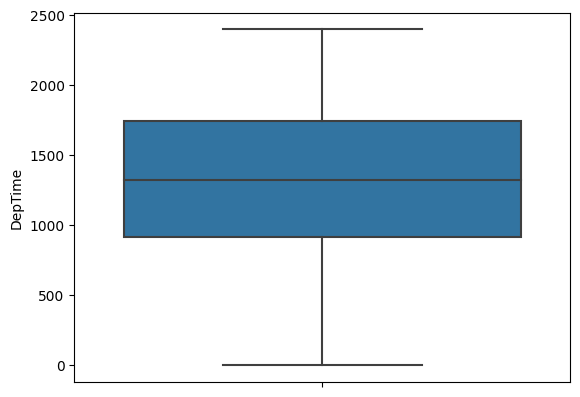

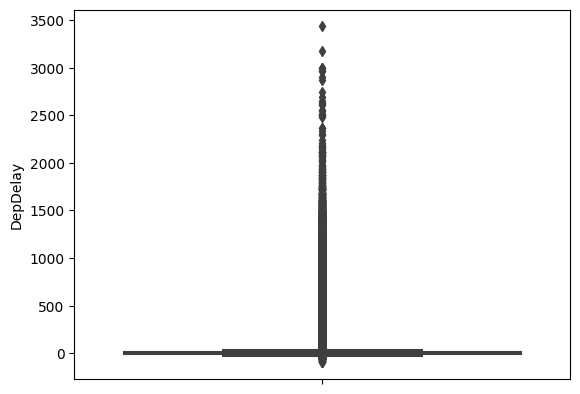

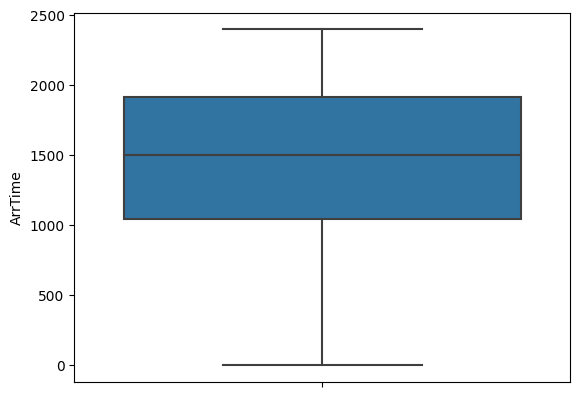

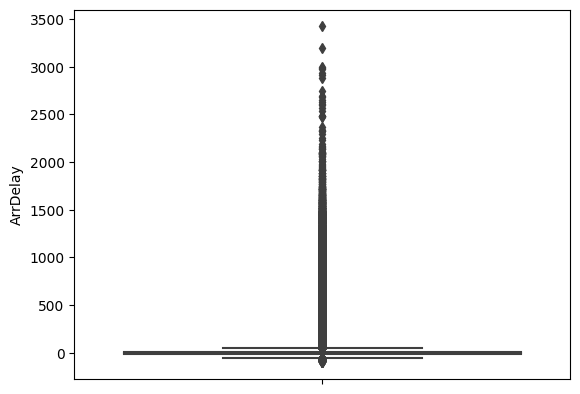

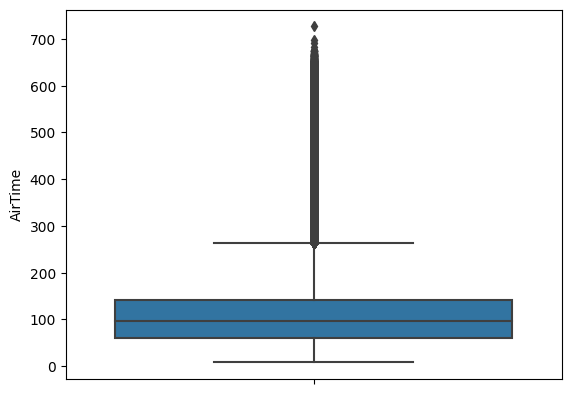

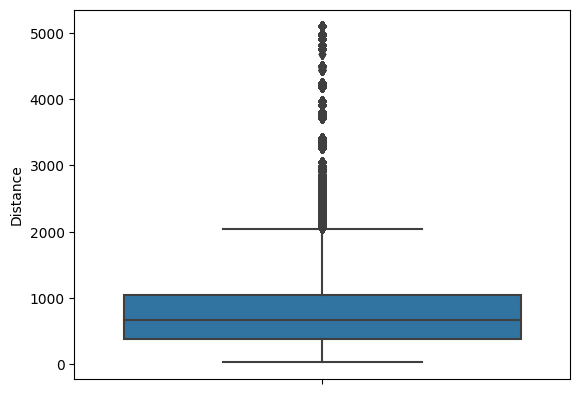

In [295]:
for c in continuous_cols:
    sns.boxplot(y=df[c])
    plt.show()

### We can see that there are no outliers in DepTime and ArrTime

In [296]:
max(df.DepTime)

2400.0

In [297]:
min(df.DepTime)

1.0

In [298]:
max(df.ArrTime)

2400.0

In [299]:
min(df.ArrTime)

1.0

### DepDelay and ArrDelay plots look highly skewed, that could be because for a lot of flights the value for these 2 columns will be 0 or even less than 15 minutes. So let's assume a flight is delayed if the delay is greater than 15 minutes and let's re=plot these 2 graphs.

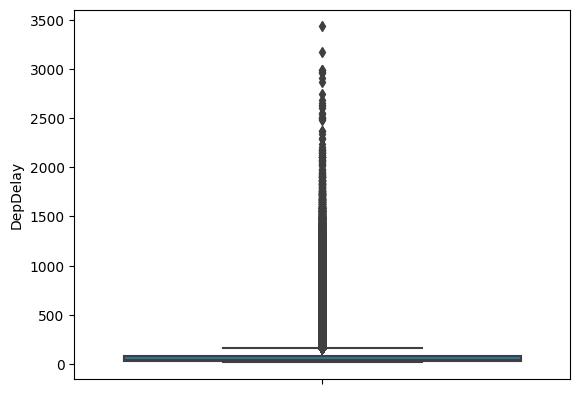

In [300]:
sns.boxplot(y=df[df['DepDelay']>15]['DepDelay'])
plt.show()

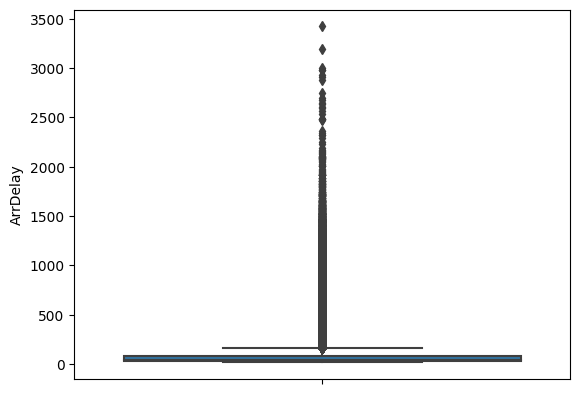

In [301]:
sns.boxplot(y=df[df['ArrDelay']>15]['ArrDelay'])
plt.show()

### The box plots are difficult to read, possibly because of large variation in values, let's plot histograms.

<AxesSubplot: xlabel='DepDelay', ylabel='Count'>

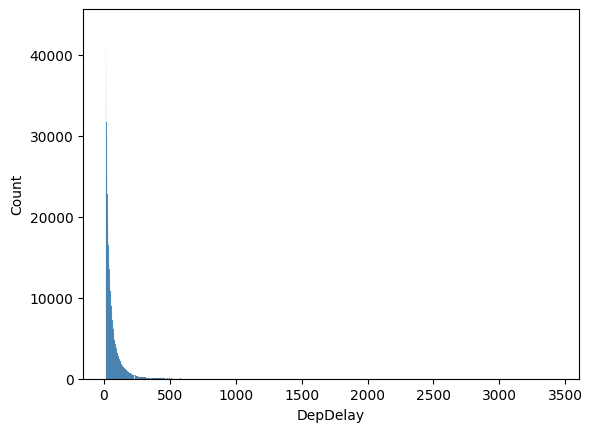

In [302]:
sns.histplot(x=df[df['DepDelay']>15]['DepDelay'])

In [303]:
max(df[df['DepDelay']>15]['DepDelay'])

3433.0

<AxesSubplot: xlabel='ArrDelay', ylabel='Count'>

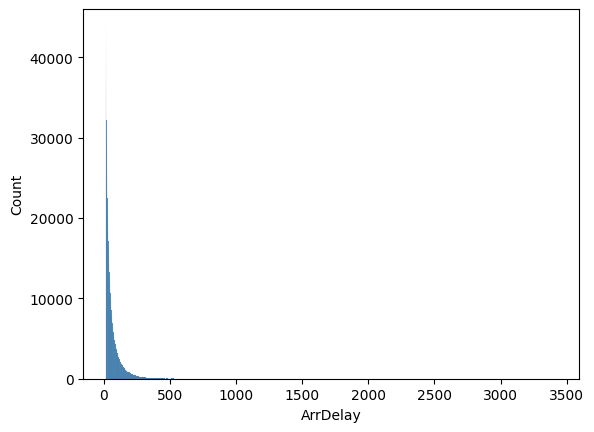

In [304]:
sns.histplot(x=df[df['ArrDelay']>15]['ArrDelay'])

In [305]:
max(df[df['ArrDelay']>15]['ArrDelay'])

3423.0

### We can observe that the plots are skewed towards left for both ArrDelay and DepDelay and majority of delays are less than 500 minutes (we can even take 200 minutes as cap), anything above that can be considered an outlier. Let's see how many values fall in that category.

In [306]:
df[df['DepDelay']>200]['DepDelay']

45         292.0
77         203.0
349        249.0
659        235.0
809        303.0
           ...  
6728702    343.0
6728808    249.0
6728859    371.0
6728898    265.0
6728901    216.0
Name: DepDelay, Length: 64939, dtype: float64

In [307]:
df[df['ArrDelay']>200]['ArrDelay']

45         289.0
77         206.0
349        268.0
379        205.0
659        232.0
           ...  
6728702    330.0
6728808    234.0
6728859    379.0
6728898    300.0
6728901    246.0
Name: ArrDelay, Length: 64420, dtype: float64

In [308]:
df[((df['ArrDelay']>200) | (df['DepDelay']>200))].shape

(70019, 20)

In [309]:
(70019/df.shape[0])*100

1.0719361813787238

In [310]:
df[((df['ArrDelay']>200) | (df['DepDelay']>200))].index

Int64Index([     45,      77,     349,     379,     659,     722,     809,
                863,     867,    1079,
            ...
            6728410, 6728467, 6728468, 6728475, 6728519, 6728702, 6728808,
            6728859, 6728898, 6728901],
           dtype='int64', length=70019)

### There are 1% flights with delay more than 200 minutes, which are extremely less number of rows and hence we can drop these rows considering them as outliers.

In [311]:
df.drop(df[((df['ArrDelay']>200) | (df['DepDelay']>200))].index, inplace=True)

### Now let's replot the histogram for DepDelay and ArrDelay

<AxesSubplot: xlabel='DepDelay', ylabel='Count'>

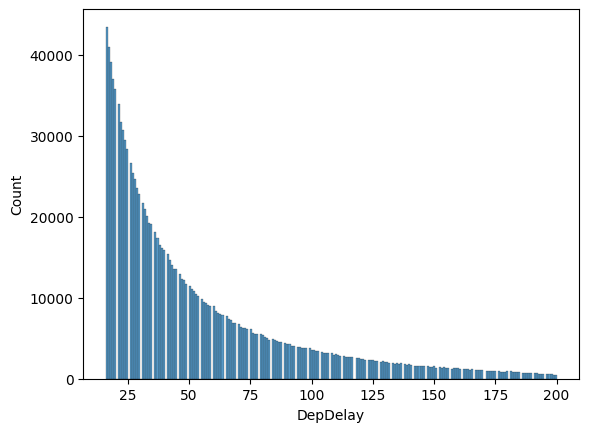

In [312]:
sns.histplot(x=df[df['DepDelay']>15]['DepDelay'])

<AxesSubplot: xlabel='ArrDelay', ylabel='Count'>

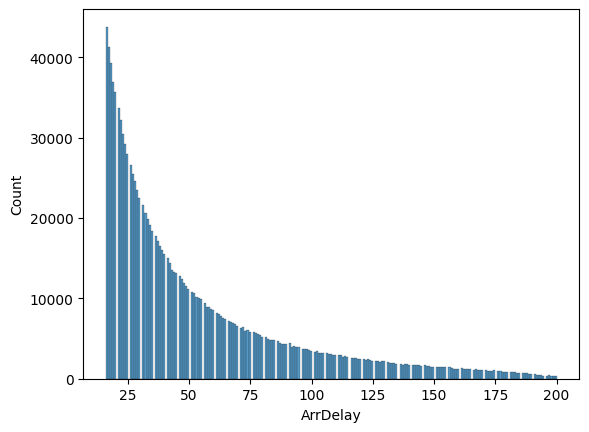

In [313]:
sns.histplot(x=df[df['ArrDelay']>15]['ArrDelay'])

In [314]:
58922+11097

70019

In [315]:
(70019/df.shape[0])*100

1.0835511582881627

In [316]:
df[((df['ArrDelay']>200) | (df['DepDelay']>200))].index

Int64Index([], dtype='int64')

### Next, from the plots, we do see a few outliers for AirTime and Distance

In [317]:
df[df['AirTime']>200].index

Int64Index([   1109,    1122,    1123,    1124,    1125,    1126,    1128,
               1129,    1130,    1131,
            ...
            6729036, 6729037, 6729101, 6729105, 6729106, 6729107, 6729109,
            6729110, 6729114, 6729121],
           dtype='int64', length=715667)

In [318]:
df[df['Distance']>1900].index

Int64Index([  66091,   66097,   66098,   66101,   66103,   66104,   66134,
              66140,   66148,   66152,
            ...
            6729028, 6729029, 6729030, 6729031, 6729032, 6729033, 6729034,
            6729035, 6729036, 6729037],
           dtype='int64', length=451222)

### There are a large number of flights with Airtime greater than 200 and Distance greater than 1900, so we can't directly drop these rows. Let's see the histogram plot of just these flights.

<AxesSubplot: xlabel='AirTime', ylabel='Count'>

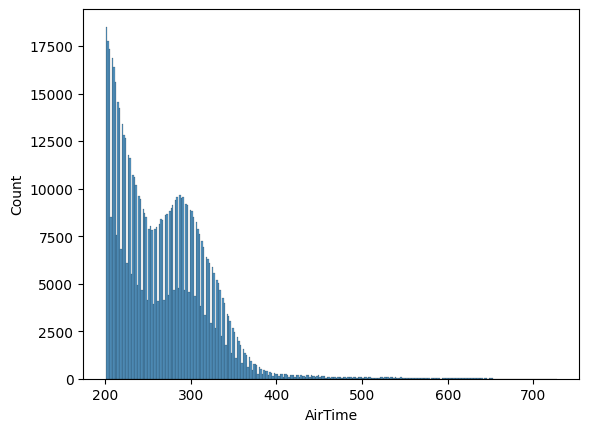

In [319]:
sns.histplot(x=df[df['AirTime']>200]['AirTime'])

In [320]:
df[df['AirTime']>400].index

Int64Index([  66307,   66720,   66734,   67433,   67453,   67454,   67465,
              67537,   67538,   67560,
            ...
            6684979, 6684980, 6684981, 6684982, 6684983, 6684984, 6684985,
            6684986, 6684987, 6718885],
           dtype='int64', length=10489)

<AxesSubplot: xlabel='Distance', ylabel='Count'>

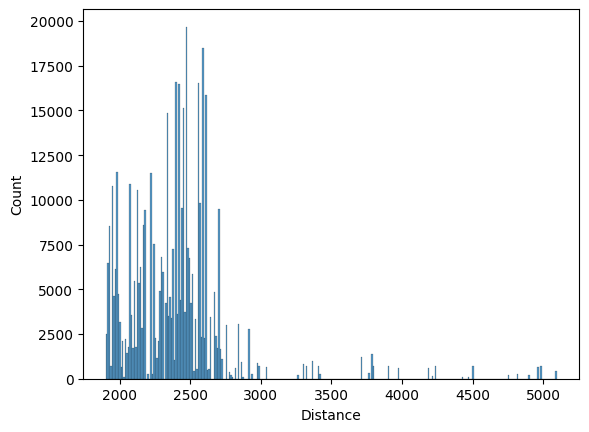

In [321]:
sns.histplot(x=df[df['Distance']>1900]['Distance'])

In [322]:
df[df['Distance']>2750].index

Int64Index([  66307,   66720,   66734,   66737,   66769,   66932,   67433,
              67434,   67453,   67454,
            ...
            6684979, 6684980, 6684981, 6684982, 6684983, 6684984, 6684985,
            6684986, 6684987, 6689675],
           dtype='int64', length=27018)

In [323]:
df[((df['AirTime']>400) | (df['Distance']>2750))].index

Int64Index([  66307,   66720,   66734,   66737,   66769,   66932,   67433,
              67434,   67453,   67454,
            ...
            6684980, 6684981, 6684982, 6684983, 6684984, 6684985, 6684986,
            6684987, 6689675, 6718885],
           dtype='int64', length=27178)

In [324]:
(27178/df.shape[0])*100

0.42058231879855024

### We can consider flights with airtime>400 and distance>2750 as outliers and drop those rows as they only comprise of 0.42% of the whole dataset.

In [325]:
df.drop(df[((df['AirTime']>400) | (df['Distance']>2750))].index, inplace=True)

<AxesSubplot: xlabel='AirTime', ylabel='Count'>

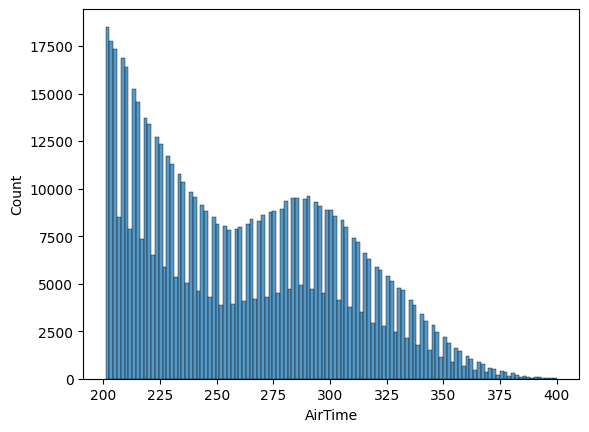

In [326]:
sns.histplot(x=df[df['AirTime']>200]['AirTime'])

<AxesSubplot: xlabel='AirTime', ylabel='Count'>

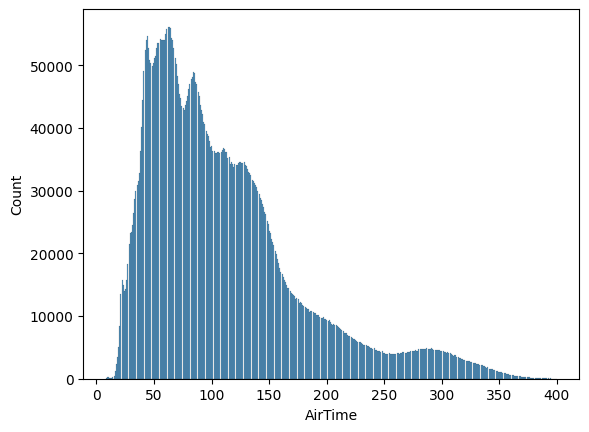

In [327]:
sns.histplot(x=df['AirTime'])

<AxesSubplot: xlabel='Distance', ylabel='Count'>

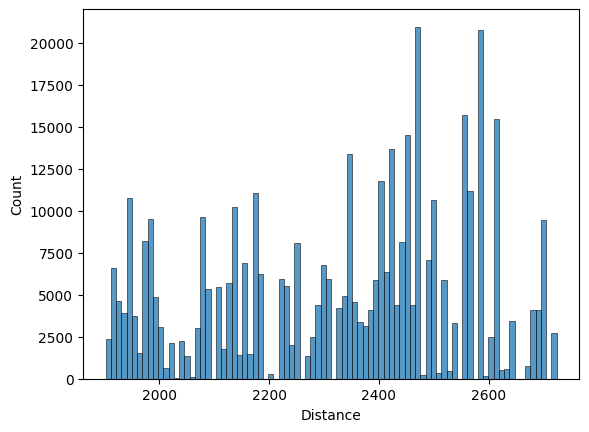

In [328]:
sns.histplot(x=df[df['Distance']>1900]['Distance'])

<AxesSubplot: xlabel='Distance', ylabel='Count'>

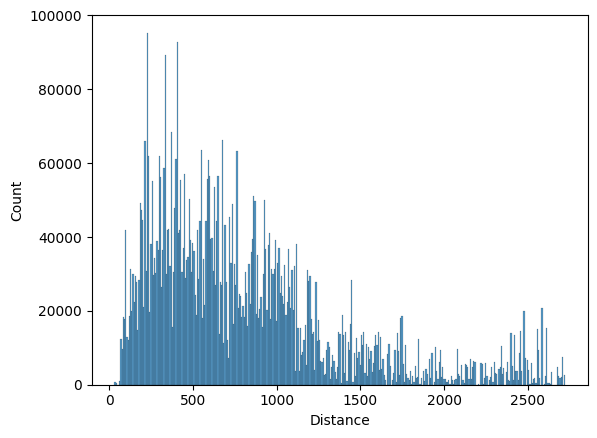

In [329]:
sns.histplot(x=df['Distance'])

### The graphs look better now, for continuous variables

### Plot bar plots for categorical variables

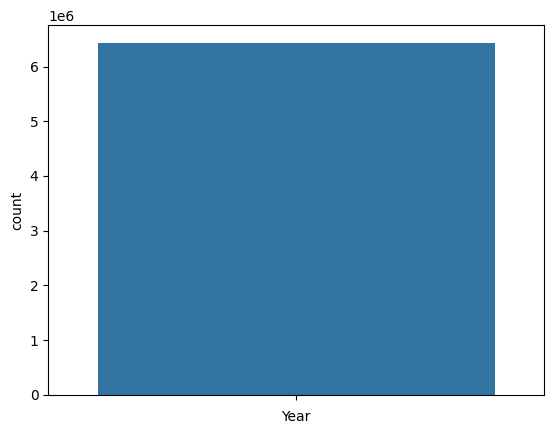

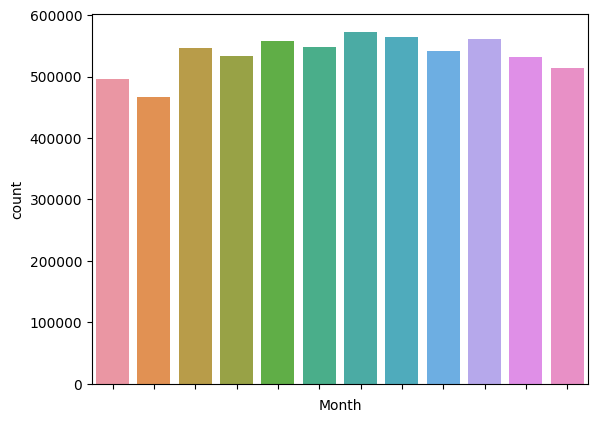

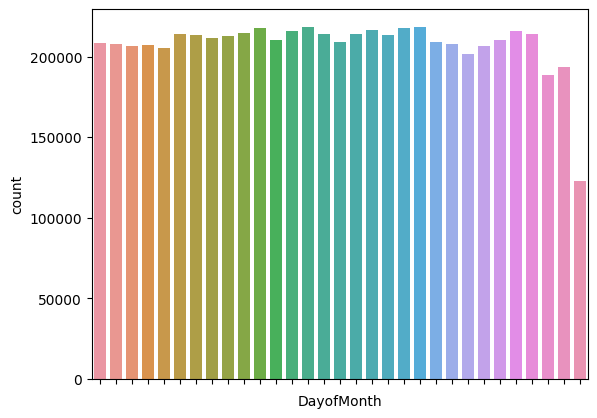

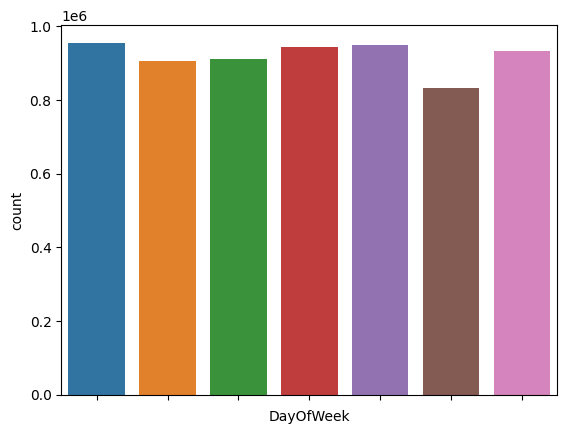

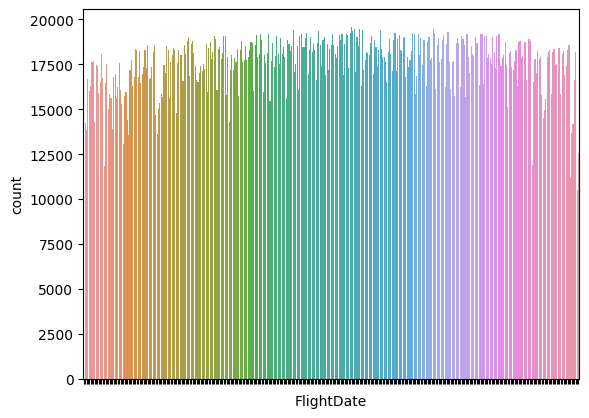

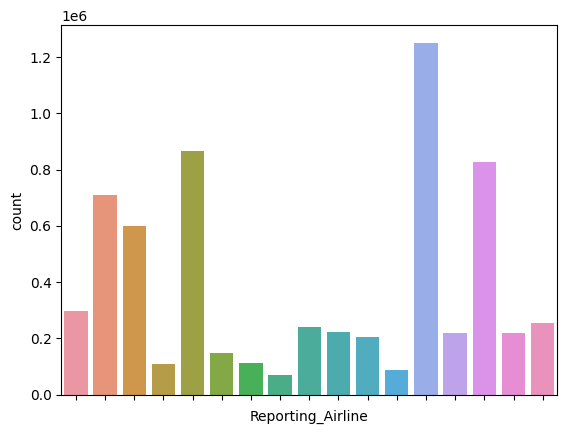

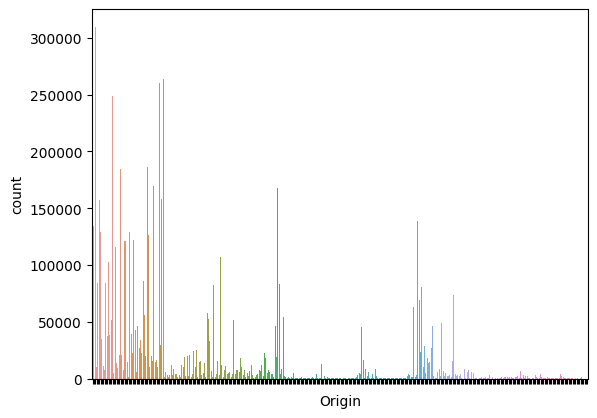

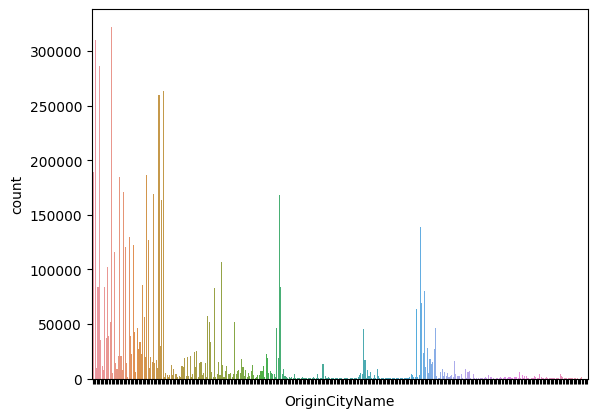

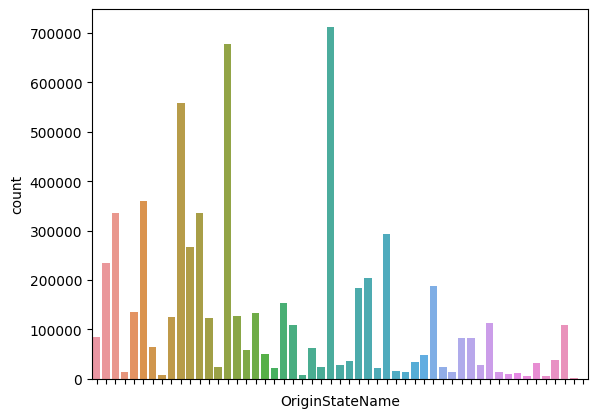

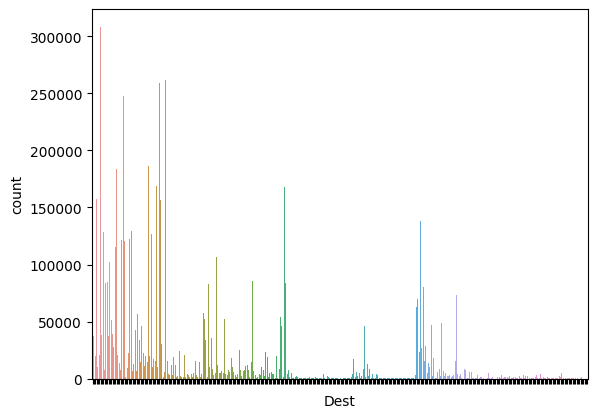

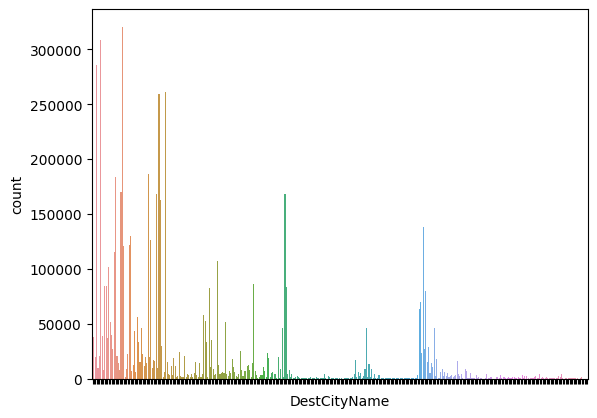

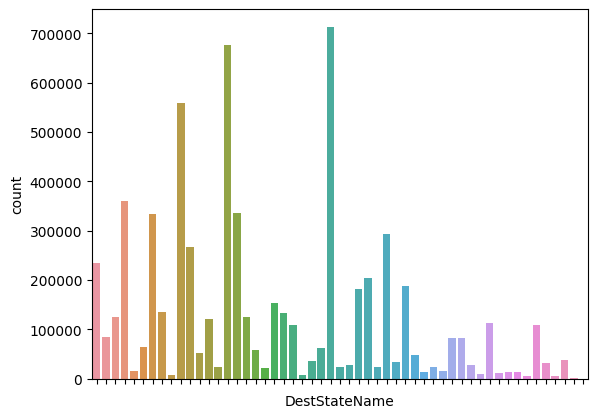

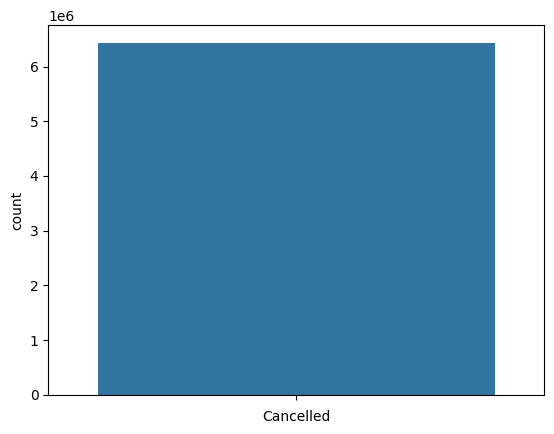

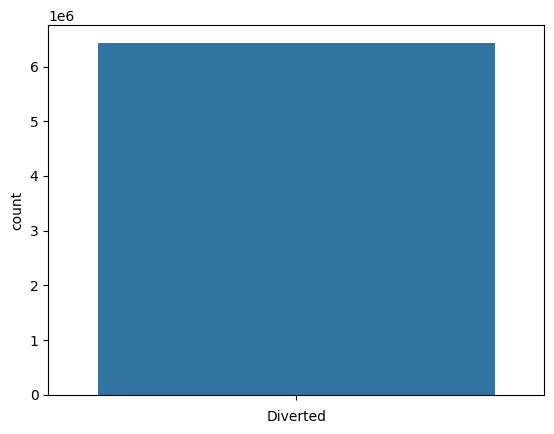

In [330]:
for c in categorical_cols:
    cp = sns.countplot(x=df[c])
    cp.set(xticklabels=[])
    plt.show()

### We are analyzing data for 2023, which makes the year column meaningless, hence dropping it.

In [331]:
df.drop(['Year'], axis=1, inplace=True)

### We already have columns with month and day, hence making the flightDate column redundant, hence dropping it.

In [332]:
df.drop(['FlightDate'], axis=1, inplace=True)

### The plots for Cancelled and Diverted columns have only 1 value

In [333]:
df.Cancelled.unique()

array([0.])

In [334]:
df.Diverted.unique()

array([0.])

### Since Cancelled and Diverted columns are not adding any value to the data, dropping these.

In [335]:
df.drop(['Cancelled', 'Diverted'], axis=1, inplace=True)

In [336]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,-3.0,1356.0,4.0,63.0,323.0
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,-10.0,1328.0,-24.0,50.0,323.0
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,-6.0,1339.0,-13.0,53.0,323.0
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,-7.0,1401.0,9.0,56.0,323.0
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,-6.0,1323.0,-29.0,48.0,323.0


### ArrDelay and DepDelay can be added and made into one column called "Delay"

In [337]:
df["Delay"] = df["DepDelay"]+df["ArrDelay"]

### If delay is less than 15 minutes, we consider delay as 0 as it's not significant.

In [338]:
df.loc[df["Delay"] < 15, "Delay"] = 0

### Now, we can drop DepDelay and ArrDelay columns

In [339]:
df.drop(['DepDelay', 'ArrDelay'], axis=1, inplace=True)

In [340]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,ArrTime,AirTime,Distance,Delay
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,1356.0,63.0,323.0,0.0
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,1328.0,50.0,323.0,0.0
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,1339.0,53.0,323.0,0.0
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,1401.0,56.0,323.0,0.0
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,1323.0,48.0,323.0,0.0


### Now, let's plot a correlation matrix

In [341]:
corr = df.corr().round(3)
corr

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_24972/4122636552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(3)


,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,Distance,Delay
Month,1.000,-0.008,0.002,-0.000,-0.001,-0.009,-0.004,-0.001
DayofMonth,-0.008,1.000,-0.008,-0.001,-0.003,0.001,0.002,0.002
DayOfWeek,0.002,-0.008,1.000,0.004,0.000,0.009,0.011,0.034
DepTime,-0.000,-0.001,0.004,1.000,0.619,-0.020,-0.017,0.193
ArrTime,-0.001,-0.003,0.000,0.619,1.000,0.024,0.021,0.049
AirTime,-0.009,0.001,0.009,-0.020,0.024,1.000,0.985,0.025
Distance,-0.004,0.002,0.011,-0.017,0.021,0.985,1.000,0.019
Delay,-0.001,0.002,0.034,0.193,0.049,0.025,0.019,1.000


<AxesSubplot: >

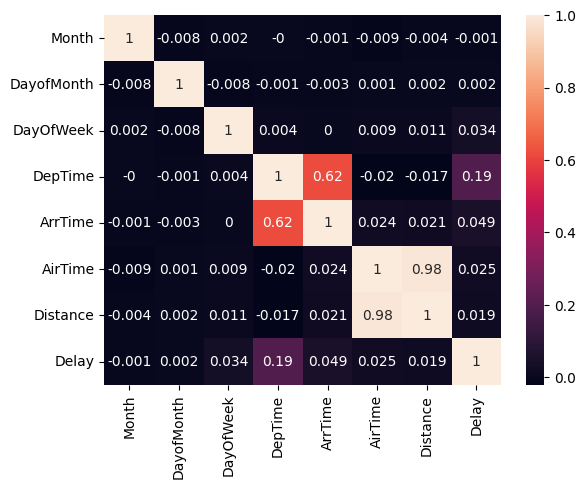

In [342]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### The first thing that stands out is that AirTime and Distance are very strongly correlated, which makes sense as the distance increases, it will take more time to cover that distance. Let's plot a scatter plot for these two columns to get better insights.

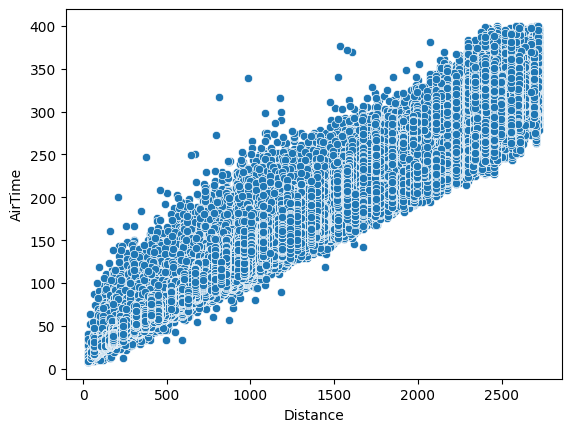

In [343]:
sns.scatterplot(x=df.Distance, y=df.AirTime)
plt.show()

### As we can see from the above scatter plot, AirTime and Distance are strongly correlated positively.

### These strongly correlated columns need to be handled to avoid the problem of multicollinearity. In this case, we can remove one of the columns as they are both conveying more or less the same information. Hence dropping the column Distance.

In [344]:
df.drop(['Distance'], axis=1, inplace=True)

In [345]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,ArrTime,AirTime,Delay
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,1356.0,63.0,0.0
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,1328.0,50.0,0.0
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,1339.0,53.0,0.0
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,1401.0,56.0,0.0
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,1323.0,48.0,0.0


### Next, we can observe from the heatmap that DepTime and Delay are very weakly correlated. Let's plot a scatter plot for these two columns as well.

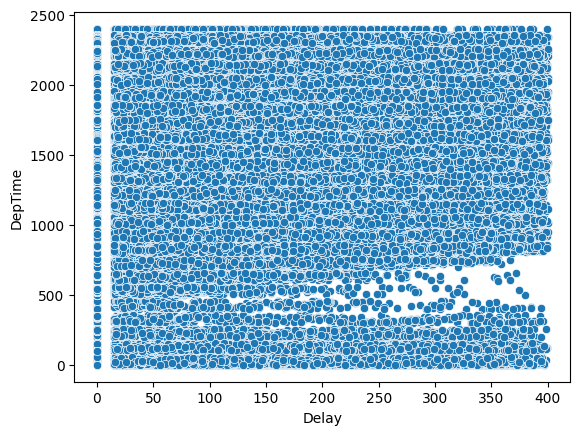

In [346]:
sns.scatterplot(x=df.Delay, y=df.DepTime)
plt.show()

### The correlation is extremely weak and is not even visible in the scatter plot, hence we'll be leaving them as is.

### Next, there is some correlation (0.62) between ArrTime and DepTime. Let's plot a scatter plot for these two columns as well.

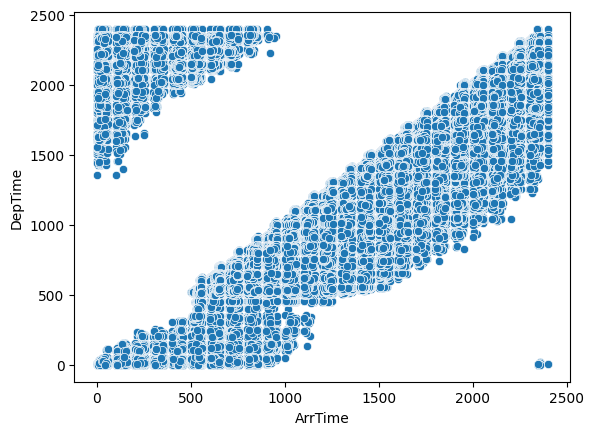

In [347]:
sns.scatterplot(x=df.ArrTime, y=df.DepTime)
plt.show()

### The ArrTime and DepTime columns have values in form of 24 hour format, keeping this in mind we can observe that they both are positively correlated for the most part. There are some values when DepTime is after around 3 PM (1500), the ArrTime is very less, this is probably because the flight is arriving the next day.

### Although, 0.62 correlation signifies moderately strong correlation, if we remove one of the columns (DepTime or ArrTime), we still have the column AirTime, so we won't be losing any information. Hence, dropping the column ArrTime.

In [348]:
df.drop(['ArrTime'], axis=1, inplace=True)

In [349]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,AirTime,Delay
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,63.0,0.0
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,50.0,0.0
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,53.0,0.0
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,56.0,0.0
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,48.0,0.0


### Plotting scatter plots of all possible combinations of the columns to observe any interesting patterns, if present.

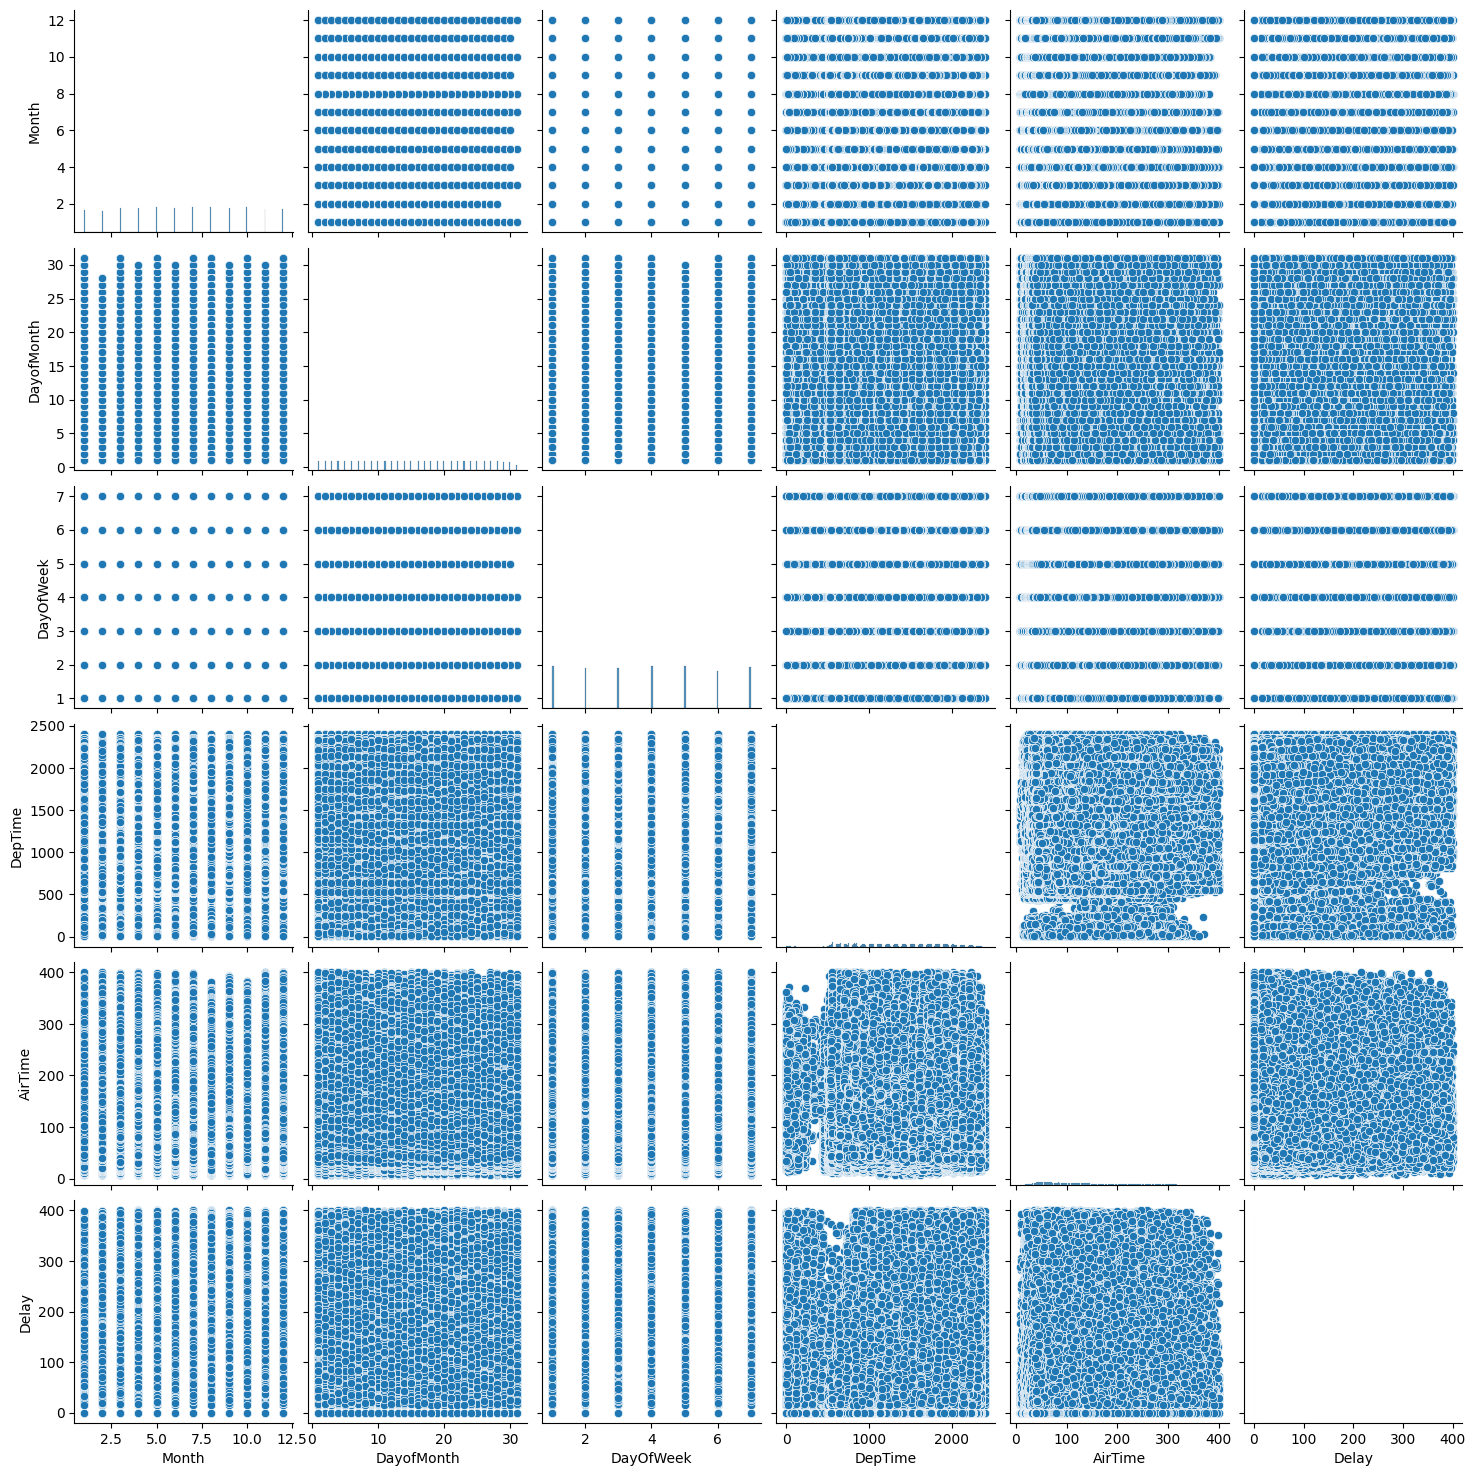

In [351]:
sns.pairplot(df)
plt.show()

### Nothing specifically new and interesting to observe in the above plots.

### Plotting a countplot to see frequency of flights for different carriers.

In [354]:
carrier_names = {
    '9E': 'Endeavor Air',
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'DL': 'Delta Air Lines',
    'F9': 'Frontier Airlines',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Airlines',
    'OH': 'PSA Airlines',
    'OO': 'SkyWest Airlines',
    'QX': 'Horizon Air',
    'UA': 'United Airlines',
    'WN': 'Southwest Airlines',
    'YV': 'Mesa Airlines',
    'YX': 'Republic Airways'
}
df['AirlineName'] = df['Reporting_Airline'].map(carrier_names)
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,AirTime,Delay,AirlineName
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,63.0,0.0,Republic Airways
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,50.0,0.0,Republic Airways
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,53.0,0.0,Republic Airways
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,56.0,0.0,Republic Airways
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,48.0,0.0,Republic Airways


In [355]:
df.AirlineName.unique()

array(['Republic Airways', 'SkyWest Airlines', 'United Airlines',
       'Mesa Airlines', 'Delta Air Lines', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'Horizon Air',
       'Southwest Airlines', 'Endeavor Air', 'American Airlines',
       'Alaska Airlines', 'JetBlue Airways'], dtype=object)

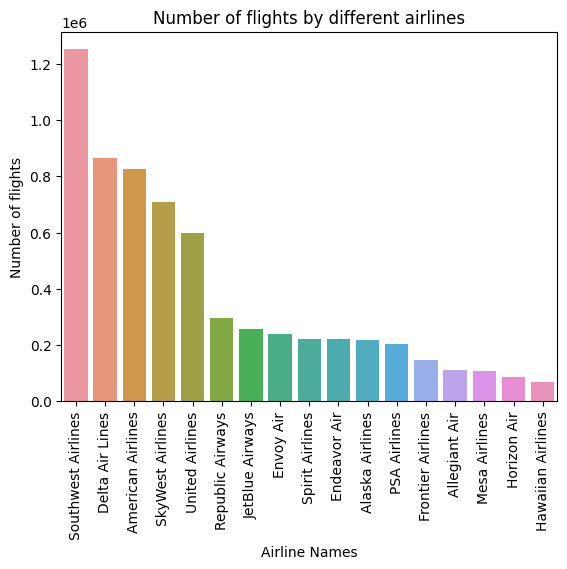

In [356]:
sns.countplot(x = df['AirlineName'], data = df, order= df['AirlineName'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Airline Names')
plt.ylabel('Number of flights')
plt.title('Number of flights by different airlines')
plt.show()

### We can see that Southwest Airlines has the most number of flights and Hawaiian Airlines the least.

### Now let's plot the frequency of delayed flights by different airlines.

In [360]:
df['IsDelayed'] = False

In [362]:
df.loc[df['Delay']>0, 'IsDelayed'] = True

In [363]:
df.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,AirTime,Delay,AirlineName,IsDelayed
0,1,14,5,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1221.0,63.0,0.0,Republic Airways,False
1,1,15,6,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1214.0,50.0,0.0,Republic Airways,False
2,1,16,7,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,53.0,0.0,Republic Airways,False
3,1,17,1,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1217.0,56.0,0.0,Republic Airways,False
4,1,18,2,YX,CMH,"Columbus, OH",Ohio,DCA,"Washington, DC",Virginia,1218.0,48.0,0.0,Republic Airways,False


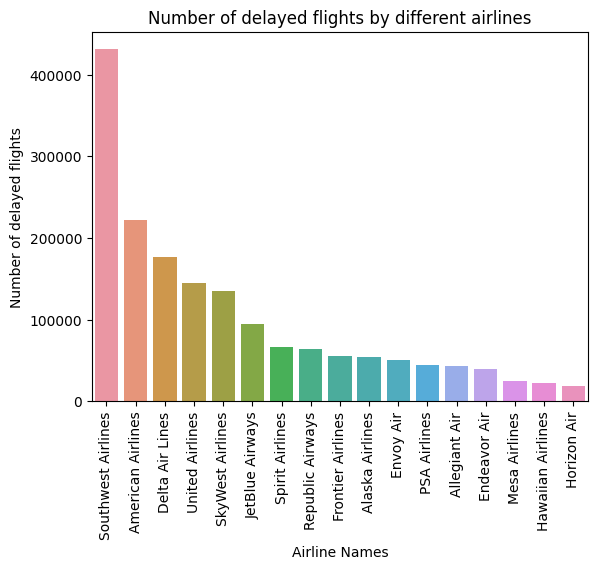

In [368]:
sns.countplot(x = df[df['IsDelayed']==True]['AirlineName'], data = df[df['IsDelayed']==True], order= df[df['IsDelayed']==True]['AirlineName'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Airline Names')
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights by different airlines')
plt.show()

### We can see that Southwest Airlines have the most number of delayed flights, and Horizon Air has the least number of delayed flights.

### Just seeing the frequency of the flights by airlines and frequency of delayed flights by airlines is not enough, we need to compare them both.

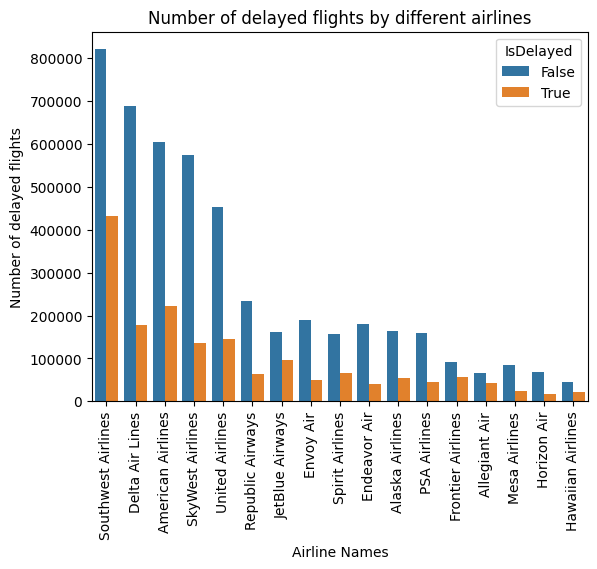

In [370]:
sns.countplot(x = 'AirlineName', data = df, hue = 'IsDelayed', order = df['AirlineName'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Airline Names')
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights by different airlines')
plt.show()

In [385]:
s1 = df['AirlineName'].value_counts()
s2 = df.loc[df.IsDelayed==True,'AirlineName'].value_counts()
s3 = (s2/s1)*100
s3.sort_values(ascending=False)

Allegiant Air         39.278322
Frontier Airlines     37.623488
JetBlue Airways       37.246422
Southwest Airlines    34.449682
Hawaiian Airlines     33.254427
Spirit Airlines       29.678511
American Airlines     26.835537
Alaska Airlines       24.806166
United Airlines       24.154774
Mesa Airlines         22.578390
PSA Airlines          21.844385
Republic Airways      21.340469
Horizon Air           21.085101
Envoy Air             20.858431
Delta Air Lines       20.450961
SkyWest Airlines      19.101658
Endeavor Air          17.961350
Name: AirlineName, dtype: float64

### Allegiant airways has the most percent of delayed flights but Southwest airlines has the most number of delayed flights, hence the Southwest airlines has more impact on the overall flight delays.